<a href="https://colab.research.google.com/github/M-II02/PropSentiment/blob/main/Sentiment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import re
import string
!pip install preprocessor
import preprocessor as p
import string
import datetime
import numpy as np
import pandas as pd

!pip install snscrape
import snscrape.modules.twitter as sntwitter
!pip install vaderSentiment
!pip install neattext
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
!pip install tweet-preprocessor

from PIL import Image
import plotly.express as px
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.sentiment.util import *
from nltk.stem import WordNetLemmatizer 
from matplotlib import pyplot as plt

import seaborn as sn
np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
query = "(#airline) until:2022-10-11 since:2022-09-01"
tweets = []
limit = 50


for tweet in sntwitter.TwitterHashtagScraper(query).get_items():
    
    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.url, tweet.content])

df = pd.DataFrame(tweets, columns=['Date', 'TweetURL','Tweet'])

df.to_csv('extracted.csv')

<ipython-input-2-e880bf7ddd96>:11: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.date, tweet.url, tweet.content])


In [ ]:
df.head(50)

In [ ]:
'''def cleanTxt(Tweet):
    text = re.sub('@[A-Za-z0–9]+', '', Tweet) #Removing @mentions
    text = re.sub('#', '', Tweet) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', Tweet) # Removing RT
    text = re.sub('https?:\/\/\S+', '', Tweet) # Removing hyperlink
    return text

#applying this function to Text column of our dataframe
df["Tweet"] = df["Tweet"].apply(cleanTxt)'''

In [4]:
def clean_text(Tweet):
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', Tweet)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', Tweet)
    
    #Remove anything that isn't a letter, number, or one of      the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', Tweet)   
    
    return text

In [5]:
df['Tweet'] = df['Tweet'].apply(clean_text)

In [6]:
df['Tweet'] = df['Tweet'].str.lower()

In [ ]:
'''df= df.drop_duplicates()
df['clean_Tweet']=df['Tweet'].str.lower()

df['clean_Tweet'] = df['Tweet'].apply(lambda x: re.sub(r"http\S+","",x))
df['clean_Tweet']=df['Tweet'].str.replace(r'\@\S+'," ",regex=True)
df['clean_Tweet']=df['Tweet'].str.replace(r'#\S+'," ",regex=True)
df['clean_Tweet']=df['Tweet'].str.replace(r'\$\S+'," ",regex=True)
df['clean_Tweet']=df['Tweet'].str.replace(r'\$\S+'," ",regex=True)
df['clean_Tweet']=df['Tweet'].apply(lambda x:[w for w in x if len(w) >= 3])
df['clean_Tweet']=df['Tweet'].apply(lambda x:" ".join(x))'''


In [8]:
df[['Tweet']].head(20)

,Tweet
0,fear of flying? businestravellife says try thi...
1,why don t #airlines have co2 monitors displayi...
2,record breaker belfast welcomes one of the wor...
3,aircraft airline airport travel trip ana jal ...
4,visit our nj career center for an onsite presc...
5,the three seats on an airplane to never select...
6,#heimflug in der #nacht der urlaub war so schn...
7,"american airlines cuts 31,000 flights from its..."
8,why does turbulence on a flight feel worse tha...
9,f #vehicle #transportation #aircraft #airplane...


In [9]:
SIA = SentimentIntensityAnalyzer()
df['Tweet']=df["Tweet"].astype(str)

df['Polarity']=df["Tweet"].apply(lambda x: SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Tweet"].apply(lambda x: SIA.polarity_scores(x)['neu'])
df['Negative Score'] = df["Tweet"].apply(lambda x: SIA.polarity_scores(x)['neg'])
df['Positive Score'] = df["Tweet"].apply(lambda x: SIA.polarity_scores(x)['pos'])

df['Sentiment']= ''
df.loc[df['Polarity'] > 0, 'Sentiment']="Positive"
df.loc[df['Polarity']== 0,'Sentiment']="Neutral"
df.loc[df['Polarity'] < 0 ,'Sentiment']="Negative"

In [10]:
df.head(20)

,Date,TweetURL,Tweet,Polarity,Neutral Score,Negative Score,Positive Score,Sentiment
0,2022-10-10 23:20:04+00:00,https://twitter.com/flightwit/status/157961276...,fear of flying? businestravellife says try thi...,0.0451,0.695,0.148,0.156,Positive
1,2022-10-10 23:12:19+00:00,https://twitter.com/TildeCafe_/status/15796108...,why don t #airlines have co2 monitors displayi...,0.8105,0.788,0.000,0.212,Positive
2,2022-10-10 22:37:04+00:00,https://twitter.com/AlexKrebsKatz/status/15796...,record breaker belfast welcomes one of the wor...,0.4019,0.856,0.000,0.144,Positive
3,2022-10-10 22:18:58+00:00,https://twitter.com/aoisoraakai/status/1579597...,aircraft airline airport travel trip ana jal ...,0.0000,1.000,0.000,0.000,Neutral
4,2022-10-10 22:01:41+00:00,https://twitter.com/CAO_JOBS/status/1579593033...,visit our nj career center for an onsite presc...,0.1779,0.956,0.000,0.044,Positive
5,2022-10-10 21:05:10+00:00,https://twitter.com/OnliTraveller/status/15795...,the three seats on an airplane to never select...,0.0000,1.000,0.000,0.000,Neutral
6,2022-10-10 20:18:28+00:00,https://twitter.com/rai36de/status/15795670596...,#heimflug in der #nacht der urlaub war so schn...,-0.8316,0.818,0.182,0.000,Negative
7,2022-10-10 19:58:00+00:00,https://twitter.com/ValuedHR/status/1579561908...,"american airlines cuts 31,000 flights from its...",-0.2960,0.896,0.104,0.000,Negative
8,2022-10-10 19:40:04+00:00,https://twitter.com/flightwit/status/157955739...,why does turbulence on a flight feel worse tha...,-0.7430,0.717,0.283,0.000,Negative
9,2022-10-10 19:19:16+00:00,https://twitter.com/eriksownphoto/status/15795...,f #vehicle #transportation #aircraft #airplane...,0.3182,0.919,0.000,0.081,Positive


In [11]:
df.to_csv('extractedS.csv')

In [12]:
df_ = df[['Sentiment','Tweet']].copy()

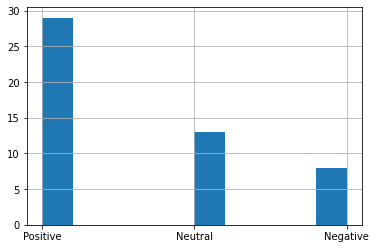

In [13]:
df_['Sentiment'].hist()

In [14]:
target_map = {'Positive':1,'Negative':0, 'Neutral':2}
df_['target'] = df_['Sentiment'].map(target_map)

In [ ]:
df_.head(25)

In [16]:
dftrain, dftest = train_test_split(df_)

In [17]:
dftrain.head()

,Sentiment,Tweet,target
36,Positive,gujarat pm modi lays foundation stone of airpo...,1
19,Positive,the dutch people demand a free market and not ...,1
42,Neutral,spicejet deposits tds of employees for 2021 22...,2
49,Positive,download the best #app to share your #best #ai...,1
26,Positive,share the #best #air content download the best...,1


In [18]:
vectorizer = TfidfVectorizer(max_features=2000)

In [19]:
X_train = vectorizer.fit_transform(dftrain['Tweet'])

In [20]:
X_train

<37x485 sparse matrix of type '<class 'numpy.float64'>'
	with 815 stored elements in Compressed Sparse Row format>

In [21]:
X_test = vectorizer.transform(dftest['Tweet'])

In [22]:
Y_train = dftrain['target']
Y_test = dftest['target']

In [23]:
df['Sentiment'].value_counts()

Positive    29
Neutral     13
Negative     8
Name: Sentiment, dtype: int64

In [24]:
model = LogisticRegression(max_iter =500)
model.fit(X_train,Y_train)
print("Train acc:",model.score(X_train,Y_train))
print("Test acc:",model.score(X_test,Y_test))

Train acc: 0.8648648648648649
Test acc: 0.6923076923076923


In [25]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC", roc_auc_score(Y_train,Pr_train,multi_class ='ovo'))
print("Test AUC", roc_auc_score(Y_test,Pr_test,multi_class ='ovo'))

Train AUC 1.0
Test AUC 0.8209876543209876


In [26]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)

In [27]:
cm = confusion_matrix(Y_train,P_train, normalize = "true")
cm

array([[0.28571429, 0.71428571, 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ]])

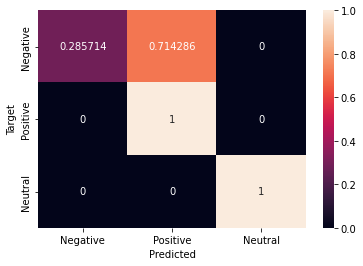

In [28]:
import pandas as pd

def plot_cm(cm):
  classes = ['Negative','Positive','Neutral']
  df_cm =pd.DataFrame(cm, index=classes, columns=classes)
  ax =sn.heatmap(df_cm,annot=True, fmt ='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)


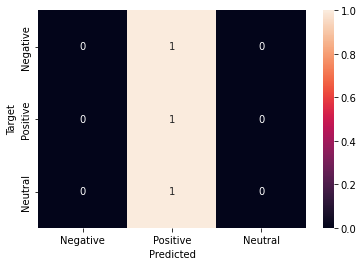

In [29]:
cm_test =confusion_matrix(Y_test,P_test, normalize='true')
plot_cm(cm_test)

In [30]:
df['Sentiment'].value_counts()

Positive    29
Neutral     13
Negative     8
Name: Sentiment, dtype: int64

In [31]:
Tweets = df.groupby(['Sentiment']).size().reset_index(name='Counts')
Tweets

,Sentiment,Counts
0,Negative,8
1,Neutral,13
2,Positive,29


In [32]:
binary_target_list = [target_map['Positive'],target_map['Negative']]
dfb_train= dftrain[dftrain['target'].isin(binary_target_list)]
dfb_test= dftest[dftest['target'].isin(binary_target_list)]

In [33]:
dfb_train.head()

,Sentiment,Tweet,target
36,Positive,gujarat pm modi lays foundation stone of airpo...,1
19,Positive,the dutch people demand a free market and not ...,1
49,Positive,download the best #app to share your #best #ai...,1
26,Positive,share the #best #air content download the best...,1
22,Negative,how likely is your airliner's engine to fail? ...,0


In [34]:
X_train= vectorizer.fit_transform(dfb_train['Tweet'])
X_test = vectorizer.transform(dfb_test['Tweet'])

In [35]:
Y_train = dfb_train['target']
Y_test = dfb_test['target'] 

In [36]:
model=LogisticRegression(max_iter=500)
model.fit(X_train,Y_train)
print("Train acc:",model.score(X_train,Y_train))
print("Test acc:",model.score(X_test,Y_test))

Train acc: 0.7407407407407407
Test acc: 0.9


In [37]:
Pr_train=model.predict_proba(X_train)[:,-1]
Pr_test=model.predict_proba(X_test)[:,-1]
print("Train AUC:",roc_auc_score(Y_train,Pr_train))
print("Test AUC:",roc_auc_score(Y_test,Pr_test))

Train AUC: 1.0
Test AUC: 0.8888888888888888


In [ ]:
model.coef_

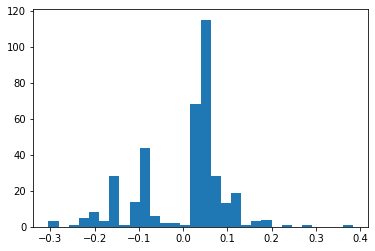

In [39]:
plt.hist(model.coef_[0],bins=30);

In [ ]:
word_index_map = vectorizer.vocabulary_
word_index_map

In [41]:
threshold=0.2

print("Most positive words:")
for word, index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight > threshold:
    print(word,weight)

Most positive words:
best 0.28084940988772333
air 0.38294537489474617
are 0.2401995965070271


In [42]:
print("Most negative words:")
for word,index in word_index_map.items():
  weight = model.coef_[0][index]
  if weight < -threshold:
    print(word,weight)

Most negative words:
flights -0.21983261936487455
fear -0.21481519058136875
flying -0.21481519058136875
every -0.2868918216210341
flight -0.22009229855826615
worst -0.23400558276406047
it -0.23908318610008586
der -0.2937105253728456
turbulence -0.3041188071813014


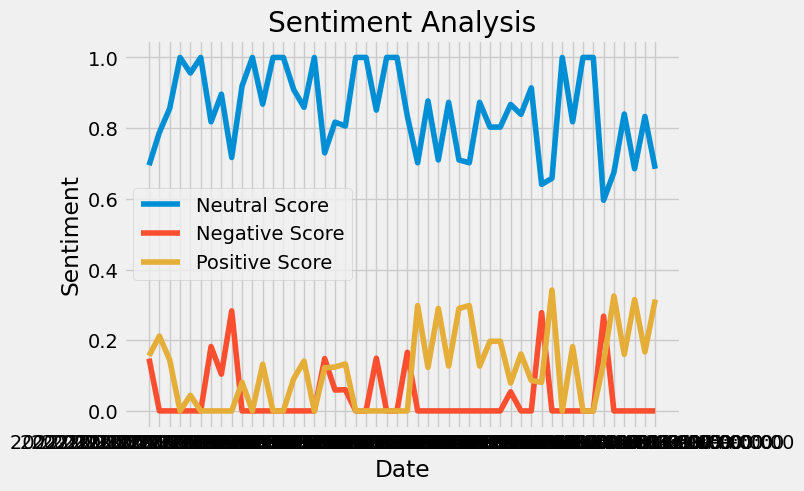

In [43]:
import pandas as pd
from matplotlib import pyplot as plot_cm

plt.rcdefaults()
plt.style.use('fivethirtyeight')

data = pd.read_csv('extractedS.csv')

date_ = data['Date']

Neutral_Score = data['Neutral Score']	
Negative_Score = data['Negative Score']	
Positive_Score = data['Positive Score']

plt.plot(date_, Neutral_Score, label="Neutral Score")
plt.plot(date_, Negative_Score, label="Negative Score")
plt.plot(date_, Positive_Score, label="Positive Score")

plt.legend()
plt.title('Sentiment Analysis')
plt.ylabel('Sentiment')
plt.xlabel('Date')

plt.savefig("plot.png")
plt.show()

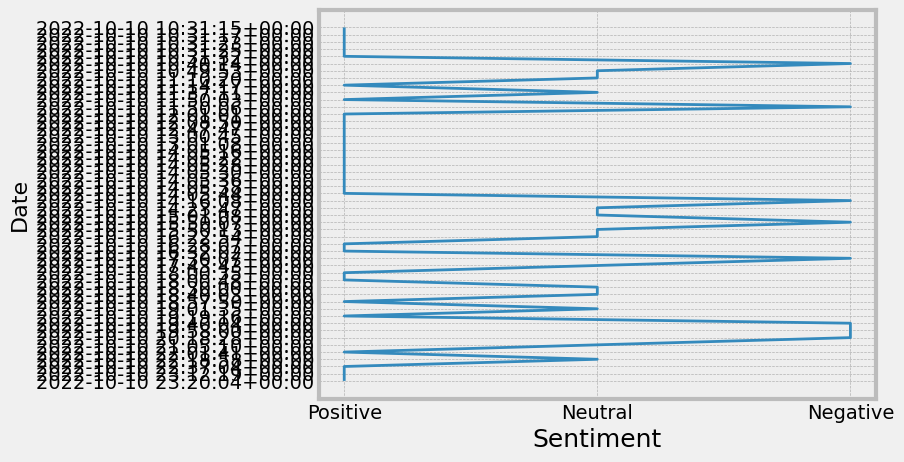

In [44]:
from matplotlib import pyplot as plt
import pandas as pd

plt.style.use('bmh')
df = pd.read_csv('extractedS.csv')

x= df['Sentiment']
y = df['Date']

plt.xlabel('Sentiment',fontsize=18)
plt.ylabel('Date',fontsize=16)
#plt.pie(y,labels=x, radius=1.2,autopct='0.01f%%',shadow=True,explode=[.05,.2,.05,.2,.05,.2,.05])
plt.plot(x,y)
plt.show()




In [ ]:
                                 #  N E W  #

In [ ]:
#https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
import plotly.express as px
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.sentiment.util import *
from nltk.stem import WordNetLemmatizer 
from matplotlib import pyplot as plt

import seaborn as sn
np.random.seed(1)

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
df_ = pd.read_csv('airline_sentiment.csv')

In [ ]:
df_.head()

,Sentiment,Tweet,target
0,Positive,fear of flying? businestravellife says try thi...,1
1,Positive,why don t #airlines have co2 monitors displayi...,1
2,Positive,record breaker belfast welcomes one of the wor...,1
3,Neutral,aircraft airline airport travel trip ana jal ...,2
4,Positive,visit our nj career center for an onsite presc...,1


In [ ]:
df = df_[['airline_sentiment','text']].copy()

In [ ]:
df.head(20)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
7,neutral,@VirginAmerica Really missed a prime opportuni...
8,positive,"@virginamerica Well, I didn't…but NOW I DO! :-D"
9,positive,"@VirginAmerica it was amazing, and arrived an ..."


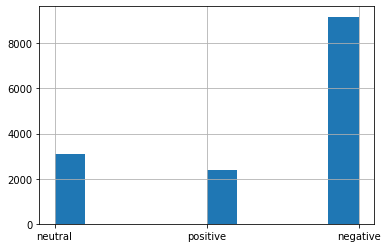

In [ ]:
df['airline_sentiment'].hist()

In [ ]:
target_map = {'positive':1,'negative':0, 'neutral':2}
df['target'] = df['airline_sentiment'].map(target_map)

In [ ]:
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [ ]:
df_train, df_test = train_test_split(df)

In [ ]:
df_train.head()

,airline_sentiment,text,target
1041,negative,@united Change made in just over 3 hours. For ...,0
1989,negative,@united The engineer that designed the 787 doo...,0
14309,negative,"@AmericanAir 11 out of 11 delayed flights, you...",0
1711,negative,@united ouch not fair,0
11542,negative,@USAirways stuck in cae need reFlight Booking ...,0


In [ ]:
vectorizer = TfidfVectorizer(max_features=2000)

In [ ]:
X_train = vectorizer.fit_transform(df_train['text'])

In [ ]:
X_train

<37x487 sparse matrix of type '<class 'numpy.float64'>'
	with 821 stored elements in Compressed Sparse Row format>

In [ ]:
X_test = vectorizer.transform(df_test['text'])

In [ ]:
Y_train = df_train['target']
Y_test = df_test['target']

In [ ]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
'''from sklearn import preprocessing
from sklearn import utils

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(target)

print(utils.multiclass.type_of_target(target))

print(utils.multiclass.type_of_target(target.astype('int')))

print(utils.multiclass.type_of_target(target))'''

In [ ]:
model = LogisticRegression(max_iter =1000)
model.fit(X_train,Y_train)
print("Train acc:",model.score(X_train,Y_train))
print("Test acc:",model.score(X_test,Y_test))

Train acc: 0.8548269581056467
Test acc: 0.7991803278688525


In [ ]:
Pr_train = model.predict_proba(X_train)#[:, 1]
Pr_test = model.predict_proba(X_test)#[:, 1]
print("Train AUC", roc_auc_score(Y_train,Pr_train,multi_class ='ovo'))
print("Test AUC", roc_auc_score(Y_test,Pr_test,multi_class ='ovo'))

Train AUC 0.9430961456387204
Test AUC 0.8953996502217668


In [ ]:
P_train = model.predict(X_train)
P_test = model.predict(X_test)


In [ ]:
cm = confusion_matrix(Y_train,P_train, normalize = "true")
cm

array([[0.96486133, 0.00813126, 0.02700741],
       [0.19966063, 0.69966063, 0.10067873],
       [0.30150538, 0.0516129 , 0.64688172]])

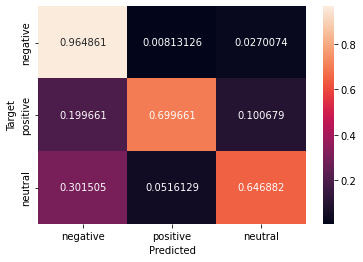

In [ ]:
import pandas as pd

def plot_cm(cm):
  classes = ['negative','positive','neutral']
  df_cm =pd.DataFrame(cm, index=classes, columns=classes)
  ax =sn.heatmap(df_cm,annot=True, fmt ='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)



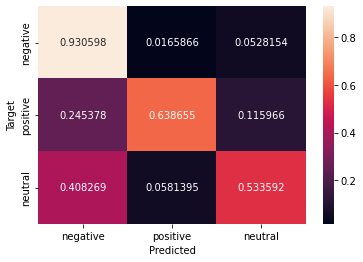

In [ ]:
cm_test =confusion_matrix(Y_test,P_test, normalize='true')
plot_cm(cm_test)

In [ ]:
df['airline_sentiment'].value_counts()


negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [ ]:
Tweets = df.groupby(['airline_sentiment']).size().reset_index(name='Counts')
Tweets

,airline_sentiment,Counts
0,negative,9178
1,neutral,3099
2,positive,2363


In [ ]:
'''import re

emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])

emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])

emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

emoticons = emoticons_happy.union(emoticons_sad)
'''

In [ ]:
'''import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

text =  open('extracted.csv',encoding='utf-8').read()
lower_case = text.lower()
cleaned_text= lower_case.translate(str.maketrans('','',string.punctuation))

tokenized_words = cleaned_text.split()


stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)

print(final_words)'''



In [ ]:
'''import os
import sys

if __name__ == '__main__':
    os.environ.setdefault('DJANGO_SETTINGS_MODULE', 'sentiment_emotion_analysis.settings')
    try:
        from django.core.management import execute_from_command_line
    except ImportError as exc:
        raise ImportError(
            "Couldn't import Django. Are you sure it's installed and "
            "available on your PYTHONPATH environment variable? Did you "
            "forget to activate a virtual environment?"
        ) from exc
    execute_from_command_line(sys.argv)'''

In [49]:
import pickle

pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))

In [50]:
#Model optimization using GridSearchCV

parameters = {'C': [1,4,8,16,32] ,'kernel':['linear', 'rbf']}
model = SVC()
model_grid = GridSearchCV(model,parameters, cv=5)

model_grid.fit(X_train,Y_train)

print(model_grid.best_params_)
print(model_grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [51]:
filename = 'sentiment_analysis.pkl'

pickle.dump(model_grid, open(filename, 'wb'))

#Load and test saved model
loaded_model = pickle.load(open(filename, 'rb'))

review = ["This is pretty much the worse movie I have ever watched. It's completely thrash!"]
new_review = vectorizer.transform(review)

result = loaded_model.predict(new_review)
print(result)

[1]
